In [268]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Viraj Patil
- PRN : 230940128038


# Deep Neural Networks

## Assignment: A03
### Neural Network with :
- One hidden layer 
- ${Tanh}$ activation function


Note: Use the base code from the lab.

### Assignment
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

Answers :
- **Q1**: Is this model more accurate compared to previous model?

        -> yes this model is more accurate than previous model.
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.


|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.9825|0.965|Base case|
|2|1|1|0.87625|0.85|Worst case|
|3|4|1|0.98125|0.965|...|
|4|8|1|0.9825|0.965|Best case|
|5|8|0.1|0.98125|0.96|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
  
->

        1. Change the number of output layer neurons to number of categories.
        2. Do one hot encoding on dataset.
        3. Change the output layer activation function to softmax from sigmoid.
        4. change the loss function to categorical cross-entropy loss function.
- **Q4**: How many epochs are sufficient?

->      

        for learning rate of 0.1 - 8000 epochs are sufficient.
        for learning rate of 1 - 2000 epochs are sufficient.

In [269]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from collections.abc import Callable
 
%matplotlib inline

In [270]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)

NOISE = 0.2
EPOCHS = 10001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [271]:
x, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)

x.shape, y.shape

((1000, 2), (1000,))

In [272]:
data_df= pd.DataFrame(x, columns=['A', 'B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [273]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [274]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [275]:
data_df['target'].unique()

array([0, 1])

<Axes: xlabel='A', ylabel='B'>

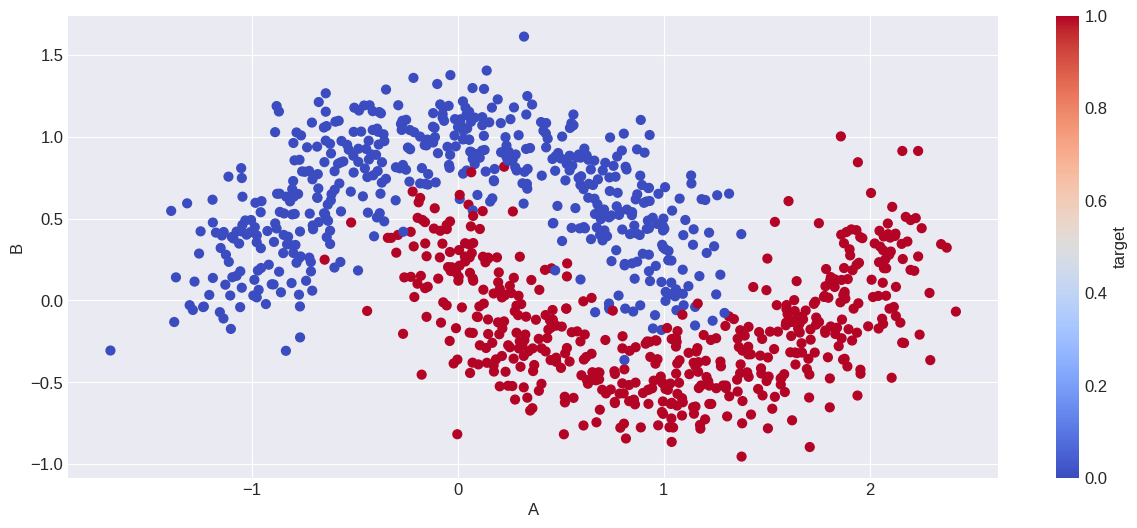

In [276]:
data_df.plot.scatter('A','B', s=40, c='target', cmap=CMAP)

<Axes: xlabel='target', ylabel='count'>

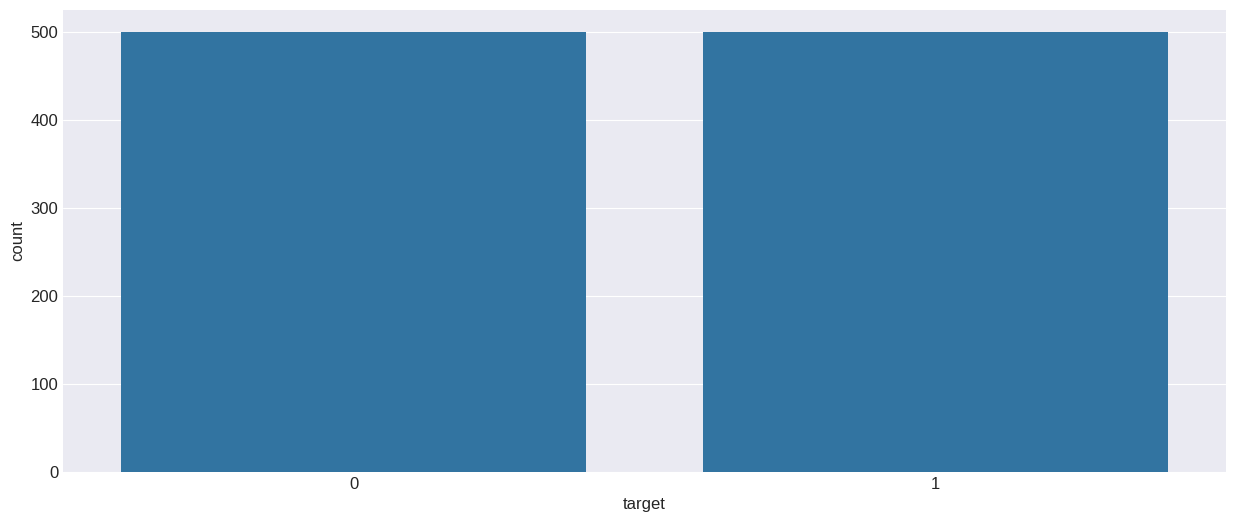

In [277]:
sns.barplot(data_df['target'].value_counts())

<Axes: xlabel='A', ylabel='B'>

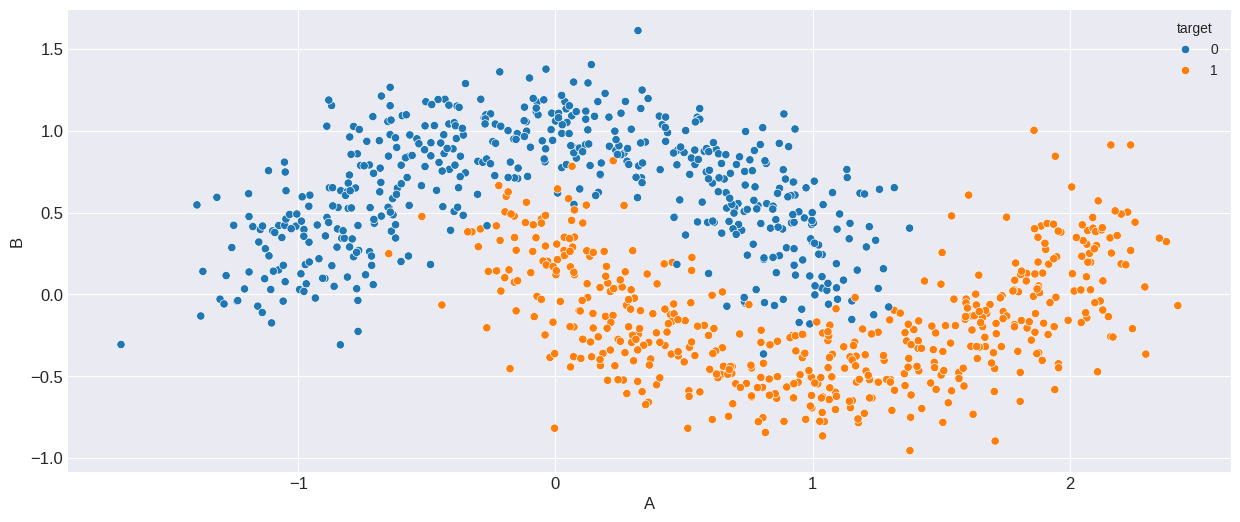

In [278]:
sns.scatterplot(data_df, x='A',y= 'B', hue='target')

In [279]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [280]:
def fn_sigmoid(z):
    return 1/(1+np.exp(-z))

In [281]:
fn_sigmoid(np.array([-np.inf, 0 ,0.5, 1, np.inf]))

array([0.        , 0.5       , 0.62245933, 0.73105858, 1.        ])

In [282]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1 - np.tanh(a)**2

In [283]:
fn_actv(np.array([[-1, 0, 1], [-np.inf, 0 , np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [284]:
np.tanh(0.5)

0.46211715726000974

In [285]:
fn_actv_prime(0.5)

0.7864477329659274

In [286]:

def predict(model : dict, X: np.ndarray):

    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    
    #### Forward Propagation   
    # Layer 1
    z1 = X.dot(W1) + b1 # Aggregation
    a1 = fn_actv (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    return a2>=0.5 # Is it greater than 0.5?

In [287]:
def calculate_loss(model : dict, X: np.ndarray, y: np.ndarray) -> np.float64:

    W1, b1, W2, b2 = model['W1'],model['b1'],model['W2'],model['b2']
    m = X.shape[0]
    
    ####---------------------
    #### Forward Propogation 
    ####--------------------- 
    
    # Layer 1
    z1 = X.dot(W1) + b1 # Aggregation
    a1 = fn_actv (z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2
    a2 = fn_sigmoid(z2)
    
    data_loss = -(y* np.log(a2)).sum()

    return 1./ m * data_loss

In [288]:
y_train.shape

(800,)

In [289]:
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [290]:
nn_input_dim = X_train.shape[1]
nn_hdim = 4
nn_output_dim = 1

hist = {}

In [291]:
# Function to train the model
def build_model (X,y, alpha= ALPHA, epochs = EPOCHS):
    W1 = np.random.rand(nn_input_dim, nn_hdim)/np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim)/np.sqrt(nn_hdim) 
    
    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))
    
    curr_loss = 0
    loss, epoch = [], []
    
    m = X.shape[0]
    
    for i in range(0, epochs):
        ####---------------------
        #### Forward Propogation 
        ####---------------------
        
        # Layer 1
        z1 = X.dot(W1) + b1  #Aggrigaion Function
        a1 = fn_actv(z1)     #Activation Function
        
        # Layer 2
        z2 = a1.dot(W2) + b2    #Aggrigaion Function
        a2 = fn_sigmoid(z2)    #Activation Function
    
        ####---------------------
        #### Back Propogation 
        ####---------------------
        
        # Layer 2
        dz2 = a2 - y
        assert(z2.shape == dz2.shape), f'error z2 {z2.shape}/{dz2.shape}'
        
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'error W2 {W2.shape}/{dW2.shape}'
        
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert(b2.shape == db2.shape), f'error b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        
        # Layer 1
        dz1 = da1 * fn_actv_prime(z1)
        
        dW1 = (X.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'error W1 {W1.shape}/{dW1.shape}'
        
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert(b1.shape == db1.shape), f'error b1 {b1.shape}/{db1.shape}'
        
        W1 += -alpha * dW1 / m # gradient update
        W2 += -alpha * dW2 / m # gradient update
        b1 += -alpha * db1 / m # gradient update
        b2 += -alpha * db2 / m # gradient update
        
        model = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
    
        if i%100 == 0:
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
            print(f'epoch : {i}: Current loss : {curr_loss}')
        
    hist['loss'] = loss
    hist['epoch'] = epoch       
           
    return model

In [292]:
model = build_model (X_train, y_train)

epoch : 0: Current loss : 0.3055226254553294
epoch : 100: Current loss : 0.2568324862256927
epoch : 200: Current loss : 0.19626278339701286
epoch : 300: Current loss : 0.16351470267504342
epoch : 400: Current loss : 0.15282889241956438
epoch : 500: Current loss : 0.14921506068957607
epoch : 600: Current loss : 0.14697773084060436
epoch : 700: Current loss : 0.1446299417592963
epoch : 800: Current loss : 0.14168034614540861
epoch : 900: Current loss : 0.13795281169306378
epoch : 1000: Current loss : 0.13348755793942046
epoch : 1100: Current loss : 0.12849733621392279
epoch : 1200: Current loss : 0.1232719663985846
epoch : 1300: Current loss : 0.11807279213527988


epoch : 1400: Current loss : 0.11307737049667865
epoch : 1500: Current loss : 0.10837849073341019
epoch : 1600: Current loss : 0.104007294787747
epoch : 1700: Current loss : 0.09995709609900753
epoch : 1800: Current loss : 0.09620011416859343
epoch : 1900: Current loss : 0.0926973667832888
epoch : 2000: Current loss : 0.08940391041519082
epoch : 2100: Current loss : 0.08627149908991034
epoch : 2200: Current loss : 0.08325039252010562
epoch : 2300: Current loss : 0.08029187664249351
epoch : 2400: Current loss : 0.07735282049346
epoch : 2500: Current loss : 0.07440272016846677
epoch : 2600: Current loss : 0.07143176242913726
epoch : 2700: Current loss : 0.06845617289331062
epoch : 2800: Current loss : 0.06551660218890668
epoch : 2900: Current loss : 0.06266811289878038
epoch : 3000: Current loss : 0.059965123411847204
epoch : 3100: Current loss : 0.057447989254972444
epoch : 3200: Current loss : 0.05513689846726134
epoch : 3300: Current loss : 0.05303379339515061
epoch : 3400: Current lo

<Axes: xlabel='epoch'>

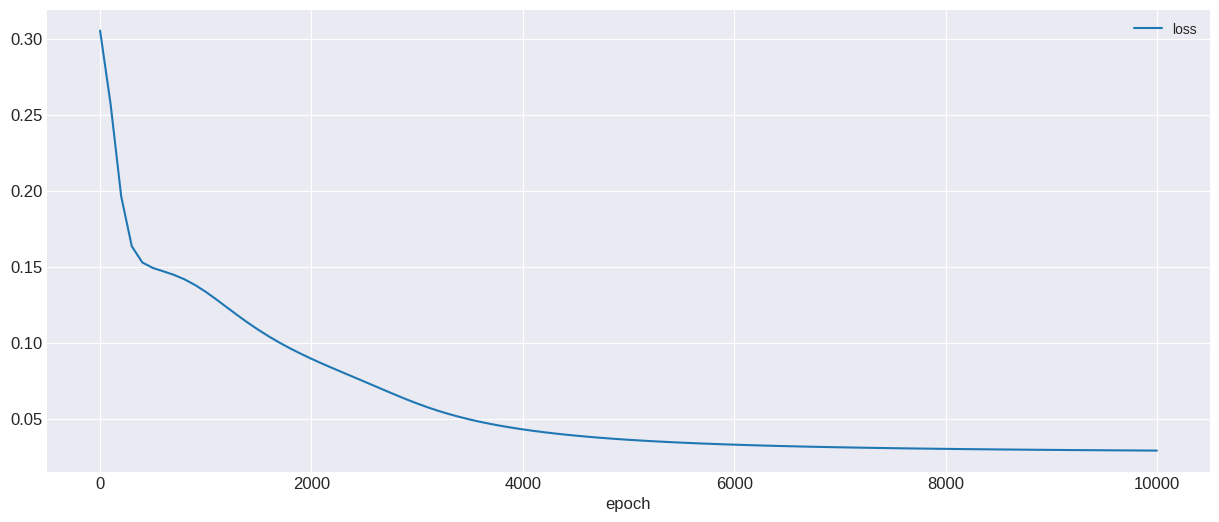

In [293]:
pd.DataFrame(hist).plot(x = 'epoch')

In [294]:
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(y_train, y_pred))

Accuracy score on Train Data : 0.9825


In [295]:
from sklearn.metrics import classification_report


print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.98      0.98      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [296]:
y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 0.965


In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       100
           1       0.98      0.95      0.96       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [298]:
predictions=[] #LIST

for row in X_test:  #iterate ove all rows
    prediction = predict(model, X_test) #make prediction
        
    predictions.append(y_pred) # collect them in a list

In [299]:
###-----------------------------------
### Function to plot Decision boundary
###-----------------------------------

def fn_plot_decision_boundary(pred_func: Callable[[], np.float64], X_tr: np.ndarray, y_tr: np.ndarray, X_ts :  np.ndarray, y_ts:  np.ndarray,):
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,edgecolor='k', cmap=plt.cm.inferno )
        

Text(0.5, 1.0, 'Decision Boundary')

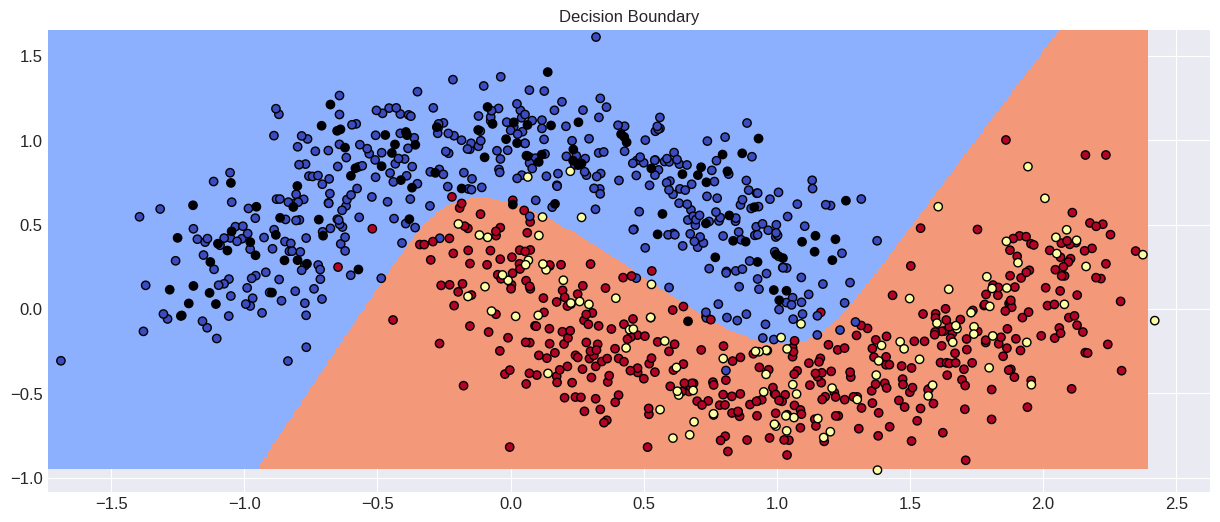

In [300]:
loss_df = pd.DataFrame(hist)

fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary")